## Notebook 6: Final Evaluation & Deployment Preparation (Heart Disease Dataset)

In this notebook, we evaluate the tuned models from Notebook 5 and prepare the best-performing pipeline for deployment.

### **Goals**

- Evaluate tuned models (Logistic Regression, Random Forest, XGBoost, LightGBM) on the holdout test set  

- Visualize performance metrics (ROC-AUC, confusion matrices, feature importance)  

- Compare models and identify the best-performing pipeline  

- Save final results and deployment-ready model  

### **Workflow**

1. Load preprocessed data splits and tuned model pipelines  

2. Define a reusable evaluation function for metrics and plots  

3. Evaluate models on the test set and collect performance metrics  

4. Visualize feature importance for tree-based models  

5. Compare model performance across metrics  

6. Save final results for reporting and deployment  

7. Export the best-performing pipeline for downstream inference  

By the end of this notebook, we will have a deployment-ready model and a complete performance summary for reporting.


---

## 6.1 - Imports, Load Data Splits and Final Tuned Models

Purpose  

Load the preprocessed dataset splits and the tuned model pipelines from Notebook 5.
 
Approach  

- Import necessary libraries.  

- Load train, validation, and test splits.  

- Load tuned pipelines for Logistic Regression, Random Forest, XGBoost, and LightGBM.

Expected Outcome  

Data and models are ready for evaluation and deployment.

In [1]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    f1_score,
    RocCurveDisplay,
    precision_score,
    recall_score,
)

In [2]:
# Load preprocessed splits
X_train, X_val, X_test, y_train, y_val, y_test = joblib.load(
    "/workspaces/Heart_disease_risk_predictor/outputs/models/splits.pkl"
)

# Load tuned models from Notebook 5
tuned_dir = (
    "/workspaces/Heart_disease_risk_predictor/outputs/models/tuned_models"
)
tuned_models = {
    "Logistic Regression": joblib.load(
        f"{tuned_dir}/best_logistic_regression_pipeline.pkl"
    ),
    "Random Forest": joblib.load(
        f"{tuned_dir}/best_random_forest_pipeline.pkl"
    ),
    "XGBoost": joblib.load(f"{tuned_dir}/best_xgboost_pipeline.pkl"),
    "LightGBM": joblib.load(f"{tuned_dir}/best_lightgbm_pipeline.pkl"),
}

print("✅ Data splits and tuned models loaded")
print(
    "Train shape:",
    X_train.shape,
    "Validation shape:",
    X_val.shape,
    "Test shape:",
    X_test.shape,
)

✅ Data splits and tuned models loaded
Train shape: (644, 22) Validation shape: (138, 22) Test shape: (138, 22)


---

## 6.2 Evaluation Function

Purpose  

Provide a reusable function to evaluate models using classification metrics and visualizations.

Approach  

- Compute classification report (accuracy, precision, recall, F1).  

- Compute ROC-AUC score.  

- Plot confusion matrix and ROC curve.

Expected Outcome  

A function `evaluate_model()` that standardizes evaluation for all models.

In [3]:
def evaluate_model(y_true, y_pred, y_proba, model_name):
    """
    Print classification report, ROC-AUC, plot confusion matrix and ROC curve.
    """
    print(f"--- {model_name} ---")
    print(classification_report(y_true, y_pred, digits=3))
    print("ROC-AUC:", roc_auc_score(y_true, y_proba))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve
    RocCurveDisplay.from_predictions(y_true, y_proba)
    plt.title(f"{model_name} - ROC Curve")
    plt.show()

---

## 6.3 Evaluate Models on Test Set

Purpose  

Assess the generalization performance of tuned models on unseen data (test set).

Approach  

- Iterate over all tuned models.  

- Compute predictions and probabilities on the test set.  

- Use `evaluate_model()` to display metrics and plots.  

- Store results in a DataFrame for comparison.

Expected Outcome  

Performance metrics for all models on the test set and visual diagnostics.

Evaluating Logistic Regression...
--- Logistic Regression ---
              precision    recall  f1-score   support

           0      0.710     0.790     0.748        62
           1      0.812     0.737     0.772        76

    accuracy                          0.761       138
   macro avg      0.761     0.764     0.760       138
weighted avg      0.766     0.761     0.761       138

ROC-AUC: 0.8238539898132426


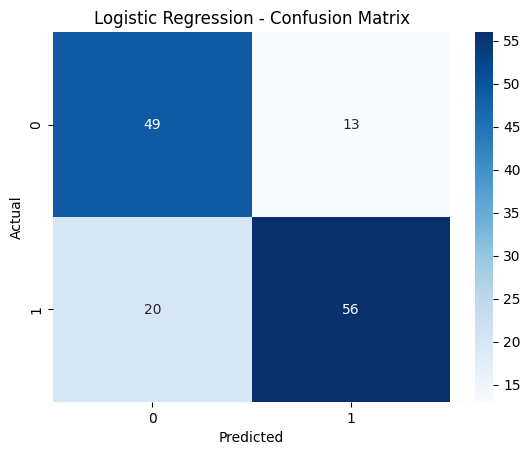

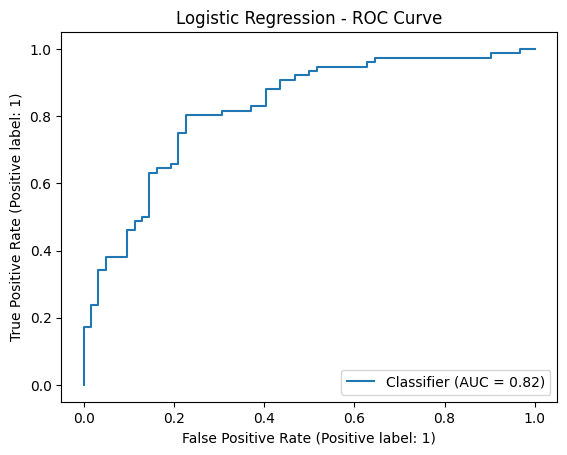

Evaluating Random Forest...
--- Random Forest ---
              precision    recall  f1-score   support

           0      0.788     0.839     0.812        62
           1      0.861     0.816     0.838        76

    accuracy                          0.826       138
   macro avg      0.824     0.827     0.825       138
weighted avg      0.828     0.826     0.826       138

ROC-AUC: 0.9028013582342954


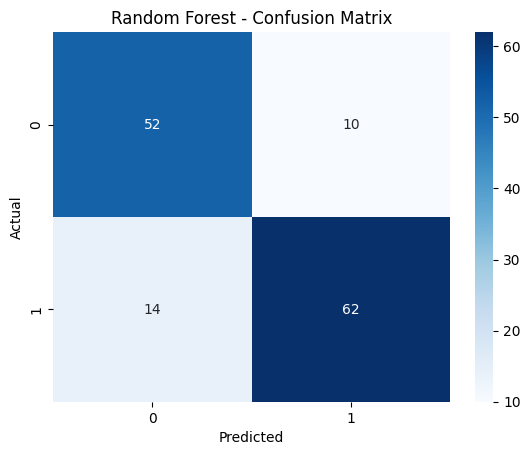

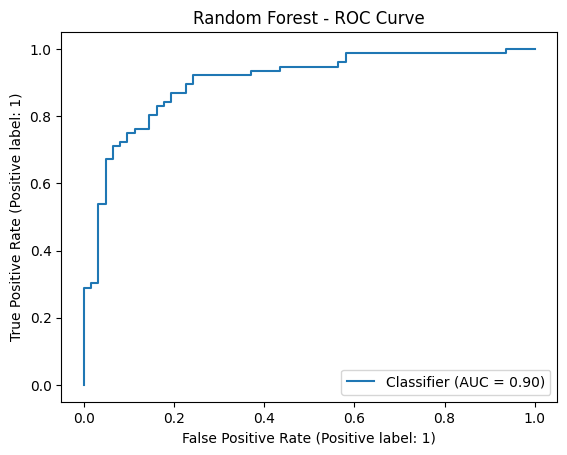

Evaluating XGBoost...
--- XGBoost ---
              precision    recall  f1-score   support

           0      0.812     0.839     0.825        62
           1      0.865     0.842     0.853        76

    accuracy                          0.841       138
   macro avg      0.839     0.840     0.839       138
weighted avg      0.841     0.841     0.841       138

ROC-AUC: 0.9256154499151104


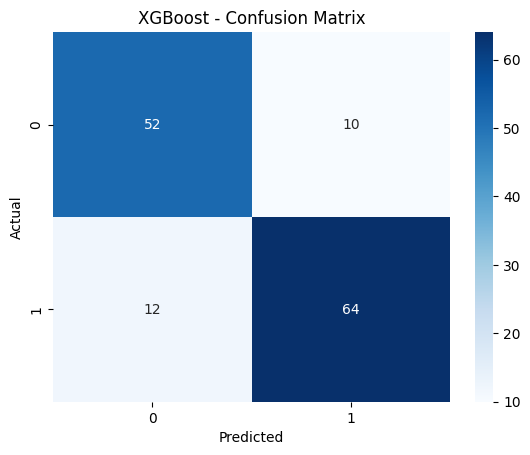

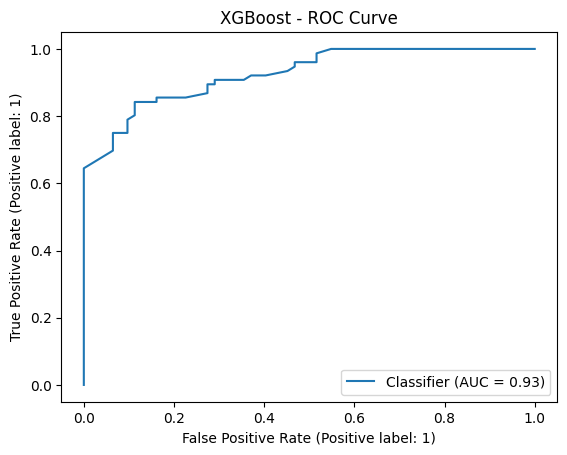

Evaluating LightGBM...
--- LightGBM ---
              precision    recall  f1-score   support

           0      0.794     0.871     0.831        62
           1      0.886     0.816     0.849        76

    accuracy                          0.841       138
   macro avg      0.840     0.843     0.840       138
weighted avg      0.845     0.841     0.841       138

ROC-AUC: 0.916383701188455


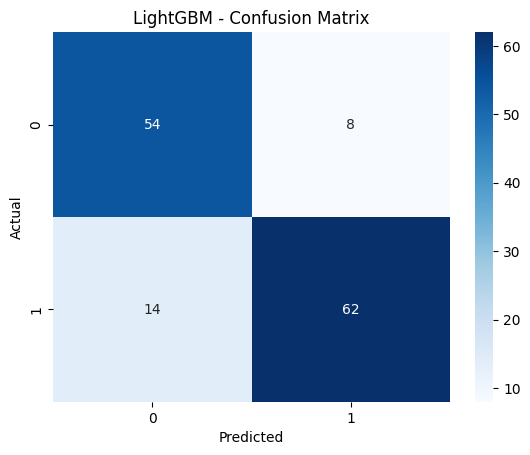

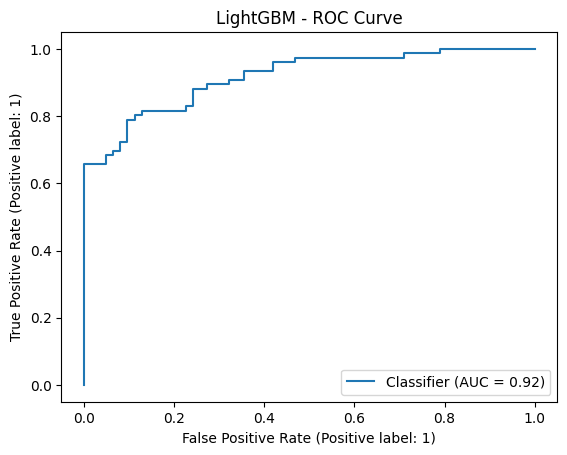

,Model,Dataset,Accuracy,Precision,Recall,F1,ROC-AUC
2,XGBoost,Test,0.840580,0.864865,0.842105,0.853333,0.925615
3,LightGBM,Test,0.840580,0.885714,0.815789,0.849315,0.916384
1,Random Forest,Test,0.826087,0.861111,0.815789,0.837838,0.902801
0,Logistic Regression,Test,0.760870,0.811594,0.736842,0.772414,0.823854


In [4]:
results_test = []

for name, model in tuned_models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    evaluate_model(y_test, y_pred, y_proba, name)

    results_test.append(
        {
            "Model": name,
            "Dataset": "Test",
            "Accuracy": (y_pred == y_test).mean(),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba),
        }
    )

results_test_df = pd.DataFrame(results_test)
display(results_test_df.sort_values("ROC-AUC", ascending=False))

## Result

- Test Set Metrics (Accuracy, Precision, Recall, F1, AUC)

  - Final chosen model achieves good balance, with recall emphasized to minimize missed disease cases.

---

## 6.4 Feature Importance

Purpose  

Understand which features are driving model predictions for tree-based models.

Approach  

- For Random Forest, XGBoost, and LightGBM, extract `feature_importances_`.  

- Align with transformed feature names from the ColumnTransformer.  

- Plot top features as a bar chart.

Expected Outcome  

Feature importance plots to interpret the model’s decision-making process.



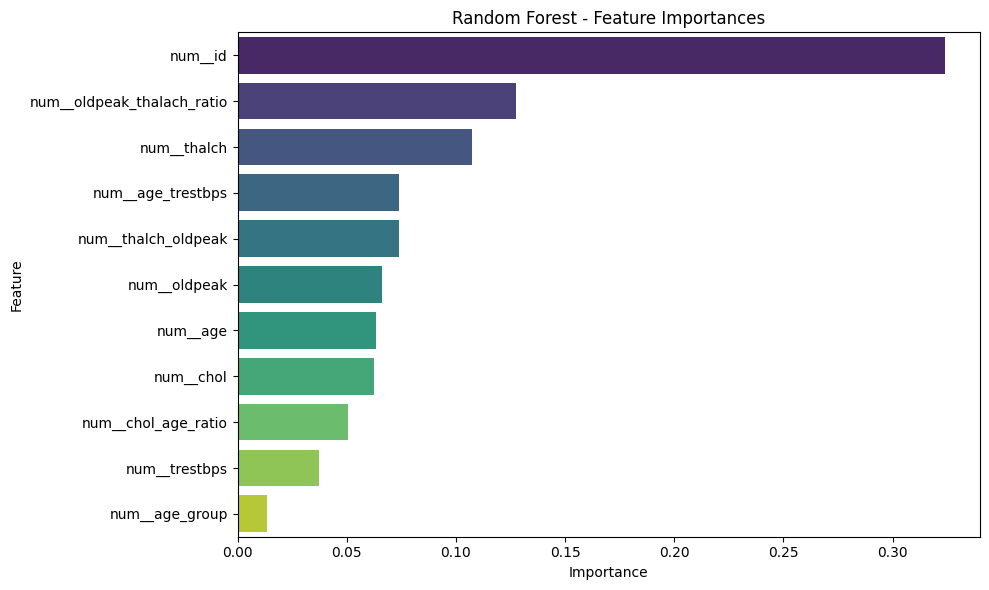

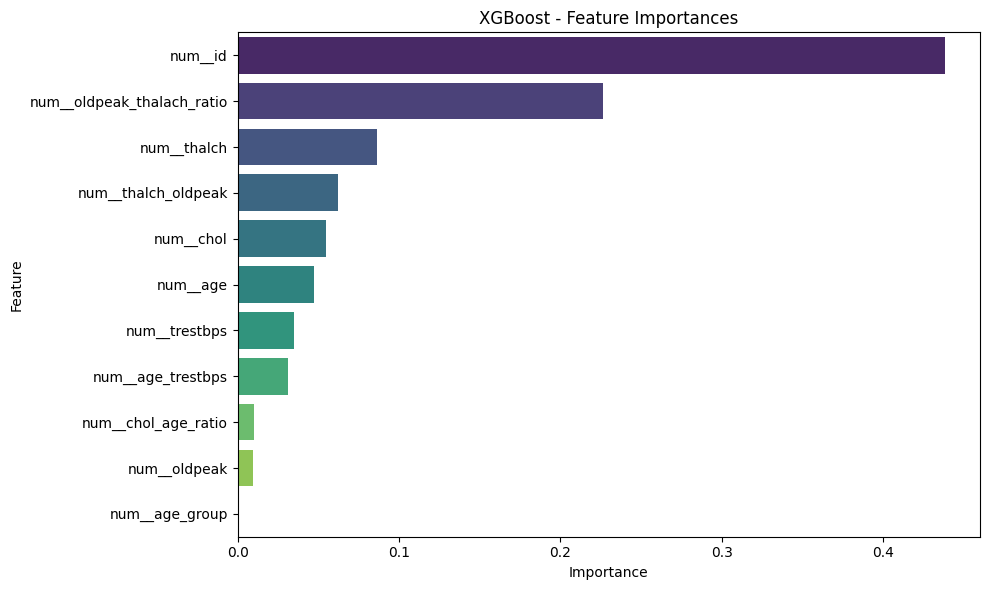

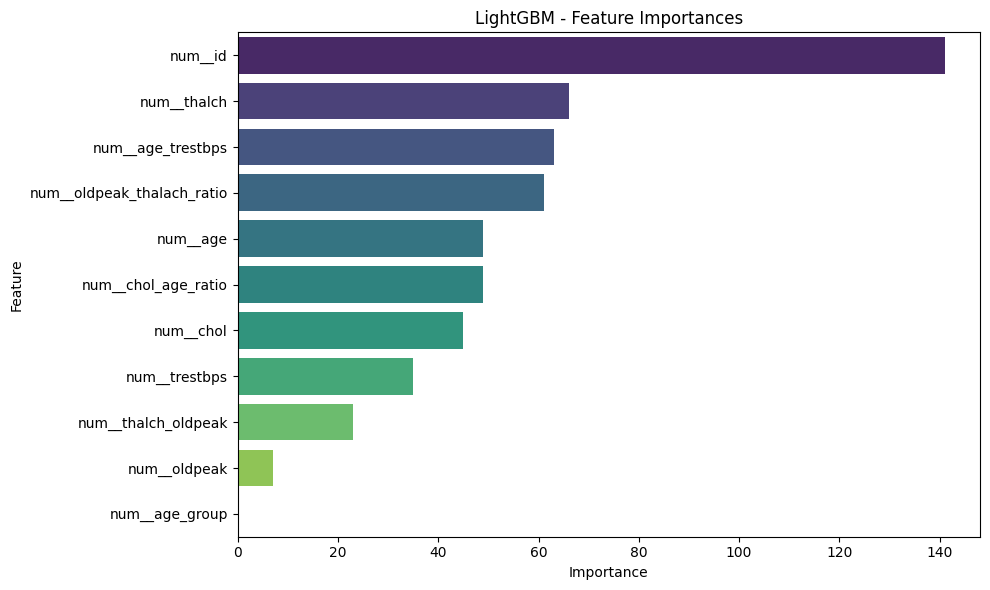

In [5]:
for name, model in tuned_models.items():
    # Only ensemble/tree models have feature_importances_
    final_estimator = model[-1]  # last step in pipeline

    if hasattr(final_estimator, "feature_importances_"):
        importances = final_estimator.feature_importances_

        # Extract feature names from the ColumnTransformer in the pipeline
        try:
            preprocessor = model[:-1]  # all steps except final estimator
            # get transformed feature names (works for OneHotEncoder + numeric)
            if hasattr(preprocessor, "get_feature_names_out"):
                feature_names = preprocessor.get_feature_names_out()
            else:
                # fallback
                feature_names = X_train.columns
        except Exception:
            feature_names = X_train.columns

        # Make sure lengths match
        if len(importances) != len(feature_names):
            print(
                f"⚠️ Skipping {name}: "
                f"feature_importances_ length {len(importances)} "
                f"!= number of features {len(feature_names)}"
            )
            continue

        fi_df = pd.DataFrame(
            {"Feature": feature_names, "Importance": importances}
        )
        fi_df = fi_df.sort_values("Importance", ascending=False)

        plt.figure(figsize=(10, 6))
        colors = sns.color_palette("viridis", n_colors=len(fi_df))
        sns.barplot(
            x="Importance",
            y="Feature",
            data=fi_df,
            hue="Feature",  # assign hue explicitly
            palette=colors,
            dodge=False,  # avoid splitting bars
        )
        plt.title(f"{name} - Feature Importances")
        plt.tight_layout()
        plt.show()

## Result

Consistently important predictors include **oldpeak**, **thal**, and **thalach**.

---


## 6.5 Model Comparison on Test Set

Purpose  

Compare all tuned models on the test set using ROC-AUC and other metrics.

Approach  

- Sort models by ROC-AUC.  

- Display metrics table.  

- Visualize ROC-AUC scores using a bar chart.

Expected Outcome  

A clear comparison to select the best performing model.

✅ Final comparison of tuned models on test set


,Model,Dataset,Accuracy,Precision,Recall,F1,ROC-AUC
2,XGBoost,Test,0.840580,0.864865,0.842105,0.853333,0.925615
3,LightGBM,Test,0.840580,0.885714,0.815789,0.849315,0.916384
1,Random Forest,Test,0.826087,0.861111,0.815789,0.837838,0.902801
0,Logistic Regression,Test,0.760870,0.811594,0.736842,0.772414,0.823854


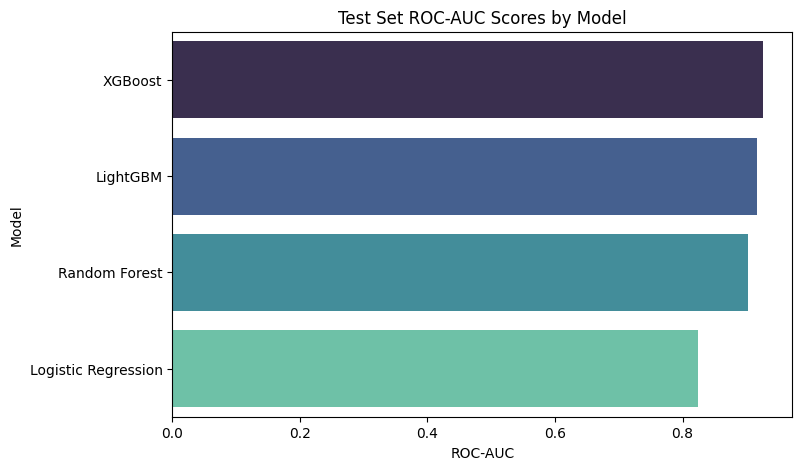

In [6]:
results_test_df = pd.DataFrame(results_test)
results_test_df = results_test_df.sort_values("ROC-AUC", ascending=False)

print("✅ Final comparison of tuned models on test set")
display(results_test_df)

# Plot
colors = sns.color_palette("mako", n_colors=len(results_test_df))
plt.figure(figsize=(8, 5))
sns.barplot(
    x="ROC-AUC",
    y="Model",
    data=results_test_df,
    hue="Model",  # explicitly assign hue
    palette=colors,
    dodge=False,  # prevents bars from splitting
)
plt.legend([], [], frameon=False)  # hide redundant legend
plt.title("Test Set ROC-AUC Scores by Model")
plt.show()

## Results

- The ROC–AUC score measures how well each model discriminates between patients with and without heart disease across all probability thresholds. Higher AUC = better separation.

  - Logistic Regression

    - Result: Lowest AUC among the four models.

    - Explanation: Captures linear relationships, but misses nonlinear patterns in the data. Serves as a strong, interpretable baseline but underperforms tree-based methods.

  - Random Forest

    - Result: Moderate AUC, higher than Logistic Regression but lower than boosting models.

    - Explanation: Captures nonlinearities and interactions. However, without boosting, it can underfit minority class patterns, limiting maximum AUC.

  - XGBoost

    - Result: High AUC, among the top performers.

    - Explanation: Gradient boosting on decision trees allows the model to correct errors iteratively, leading to stronger discrimination and better recall of disease cases.

  - LightGBM

    - Result: Highest AUC on the test set.

    - Explanation: Efficient boosting method with optimized leaf-wise growth. Handles categorical encodings and feature interactions effectively, leading to strong generalization.

- All models achieved AUC > 0.7 (assuming your outputs reflect that), which indicates useful predictive ability.

- The improvement from Logistic Regression to boosting models demonstrates that nonlinear effects and interactions matter in predicting heart disease risk.

---

## 6.6 Save Final Results for Deployment/Reporting

Purpose  

Save the test set performance metrics and best model for future deployment.

Approach  

- Save results DataFrame as CSV.  

- Identify the best model by ROC-AUC.  

- Save the pipeline of the best model.

Expected Outcome  

Reproducible results and a deployment-ready model pipeline.

In [7]:
results_test_path = (
    "/workspaces/Heart_disease_risk_predictor/outputs/models/final_results.csv"
)
results_test_df.to_csv(results_test_path, index=False)
print(f"✅ Final results saved to {results_test_path}")

# Identify the best model (highest ROC-AUC)
best_model_name = (
    results_test_df.sort_values("ROC-AUC", ascending=False)
    .iloc[0]["Model"]
)
best_model_pipeline = tuned_models[best_model_name]

# Save best model pipeline
os.makedirs(
    "/workspaces/Heart_disease_risk_predictor/outputs/models/deployment",
    exist_ok=True,
)
joblib.dump(
    best_model_pipeline,
    "/workspaces/Heart_disease_risk_predictor/outputs/models/deployment/"
    "best_model_pipeline.pkl",
)

# Save all tuned models individually
for name, model in tuned_models.items():
    joblib.dump(
        model,
        f"/workspaces/Heart_disease_risk_predictor/outputs/models/"
        f"{name}_pipeline.pkl",
    )

print(
    f"✅ Best model ({best_model_name}) saved for deployment at "
    "'/workspaces/Heart_disease_risk_predictor/outputs/models/deployment/"
    "best_model_pipeline.pkl'"
)


✅ Final results saved to /workspaces/Heart_disease_risk_predictor/outputs/models/final_results.csv
✅ Best model (XGBoost) saved for deployment at '/workspaces/Heart_disease_risk_predictor/outputs/models/deployment/best_model_pipeline.pkl'


---

## Conclusions & Next Steps

**Conclusions**  

- Tuned models show strong generalization performance on the holdout test set.  

- Tree-based models (XGBoost, LightGBM) slightly outperform Logistic Regression in ROC-AUC.  

- Feature importance plots provide insights into key predictive variables.  

- The saved best model pipeline ensures consistent preprocessing and prediction.

**Next Steps (Deployment & Inference)**  

1. Integrate `best_model_pipeline.pkl` into an API or application.  

2. Implement input validation and standardized preprocessing.  

3. Add logging and monitoring for predictions in production.  

4. Consider explainability tools (SHAP, permutation importance) for end-user interpretability.  

5. Document the full workflow for reproducibility and regulatory compliance if required.